In [13]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
x = np.linspace(1, 10, num=100)
x

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [170]:
w_true = 12.0
b_true = 7.0

In [171]:
_y = w_true * x + b_true

In [172]:
# Add some noise
y = np.add(_y, 10 * np.random.randn(100))

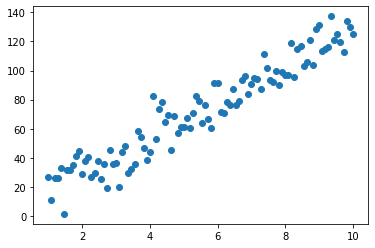

In [235]:
# Visualize the training data
plt.scatter(x, y)

In [236]:
EPOCHS = 5000

In [174]:
class LinearRegression(object):
    
    def __init__(self):
        self.b = tf.Variable(np.random.randn(), name="b")
        self.w = tf.Variable(np.random.randn(), name="w")
    
    def __call__(self, x):
        return self.w * x + self.b

In [175]:
def loss(y, y_true):
    return tf.reduce_mean(tf.square(y_true-y))

In [176]:
loss(_y, y)

<tf.Tensor: shape=(), dtype=float64, numpy=96.745606632736>

In [237]:
def train(lr, x, epochs=1000, learning_rate=0.02, ):
    ws = []
    bs = []
    ls = []
    for i in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = lr(x)
            l = loss(y_pred, y)
        d_w, d_b = tape.gradient(l, [lr.w, lr.b])
        lr.w.assign_sub(d_w * learning_rate)
        lr.b.assign_sub(d_b * learning_rate)
        ws.append(lr.w.numpy())
        bs.append(lr.b.numpy())
        ls.append(l.numpy())
        print(lr.w, lr.b, l)
    return ws, bs, ls

In [238]:
lr = LinearRegression()

In [239]:
ws, bs, ls = train(lr, x, epochs=EPOCHS)

<tf.Variable 'w:0' shape=() dtype=float32, numpy=19.957405> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7239656> tf.Tensor(8203.314, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=8.58331> <tf.Variable 'b:0' shape=() dtype=float32, numpy=3.0394783> tf.Tensor(2273.0215, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=14.475502> <tf.Variable 'b:0' shape=() dtype=float32, numpy=3.9246714> tf.Tensor(680.5689, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=11.420368> <tf.Variable 'b:0' shape=() dtype=float32, numpy=3.4781744> tf.Tensor(252.94826, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=13.001727> <tf.Variable 'b:0' shape=() dtype=float32, numpy=3.721667> tf.Tensor(138.11775, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.180481> <tf.Variable 'b:0' shape=() dtype=float32, numpy=3.6075208> tf.Tensor(107.28013, shape=(), dtype=float32)
<tf.Varia

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.397529> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.0715523> tf.Tensor(95.82229, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.396816> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.0763345> tf.Tensor(95.821106, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.396111> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.081082> tf.Tensor(95.81993, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.395408> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.0857944> tf.Tensor(95.81877, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.394713> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.0904737> tf.Tensor(95.817635, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.39402> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.095118> tf.Tensor(95.816536, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.352261> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.375707> tf.Tensor(95.76426, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.351878> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.378282> tf.Tensor(95.76391, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.351498> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.380838> tf.Tensor(95.76357, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.35112> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.3833756> tf.Tensor(95.76323, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.350744> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.385895> tf.Tensor(95.76292, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.350373> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.388396> tf.Tensor(95.762596, shape=(), dtype=float32)
<tf.Variable 'w

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.326475> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.5489616> tf.Tensor(95.74678, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.32628> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.550279> tf.Tensor(95.74668, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.326085> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.551587> tf.Tensor(95.74659, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.325891> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.5528855> tf.Tensor(95.746506, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.3257> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.5541744> tf.Tensor(95.74644, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.325509> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.555454> tf.Tensor(95.74633, shape=(), dtype=float32)
<tf.Variable 'w

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.314006> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6327505> tf.Tensor(95.74237, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.313899> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6334596> tf.Tensor(95.74234, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.313795> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.634164> tf.Tensor(95.74232, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.313691> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.634863> tf.Tensor(95.7423, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.313587> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6355567> tf.Tensor(95.74226, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.313485> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6362457> tf.Tensor(95.74225, shape=(), dtype=float32)
<tf.Variable 

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.307582> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.67591> tf.Tensor(95.74114, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.307523> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6763062> tf.Tensor(95.74112, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.307465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6766996> tf.Tensor(95.74111, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.307406> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.67709> tf.Tensor(95.74111, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.307348> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6774774> tf.Tensor(95.7411, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.307292> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.677862> tf.Tensor(95.7411, shape=(), dtype=float32)
<tf.Variable 'w:0

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.304095> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.699337> tf.Tensor(95.74075, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.304062> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.699563> tf.Tensor(95.74076, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.3040285> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.6997876> tf.Tensor(95.74076, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.303994> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7000103> tf.Tensor(95.74075, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.303963> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7002316> tf.Tensor(95.74075, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.303928> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.700451> tf.Tensor(95.74073, shape=(), dtype=float32)
<tf.Variable

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.302086> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7128377> tf.Tensor(95.740616, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.302067> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.712966> tf.Tensor(95.74063, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.302048> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7130933> tf.Tensor(95.74063, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.302029> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7132196> tf.Tensor(95.74065, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.302011> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.713345> tf.Tensor(95.74062, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.301991> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7134695> tf.Tensor(95.740616, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300853> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.721121> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300843> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.721189> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300833> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7212563> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300823> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7213235> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300814> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.72139> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300803> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7214556> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Vari

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300249> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.72518> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300243> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.725219> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300238> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.725257> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300232> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7252946> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.300226> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7253323> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.3002205> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7253695> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Varia

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299894> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7275653> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299891> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7275863> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299888> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7276073> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299885> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.727628> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299881> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7276487> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299879> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7276697> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variabl

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299732> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.728653> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.29973> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7286663> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299727> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7286797> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.2997265> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.728693> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299725> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.728706> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299722> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7287188> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299618> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7294235> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299616> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.729431> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299616> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.729439> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299614> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7294464> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299613> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.729454> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299612> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7294617> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299549> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7298884> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299547> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7298927> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299547> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.729897> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299546> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7299013> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299545> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7299056> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299545> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.72991> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299511> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730144> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.29951> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7301464> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299509> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730149> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299509> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730151> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299509> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7301536> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299508> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730156> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299489> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730289> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299489> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7302904> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299487> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730292> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299488> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7302933> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299488> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7302947> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299488> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730296> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299476> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730378> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299475> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7303786> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299476> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7303796> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299475> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.73038> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299476> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730381> tf.Tensor(95.74057, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299475> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7303815> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299469> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304206> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299469> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730421> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299469> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304215> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299469> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730422> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299469> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304225> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299469> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.730423> tf.Tensor(95.740585, shape=(), dtype=float32)
<tf.Var

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variable 'w:0' shape=() dtype=float32, numpy=12.299465> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.7304482> tf.Tensor(95.74058, shape=(), dtype=float32)
<tf.Variab

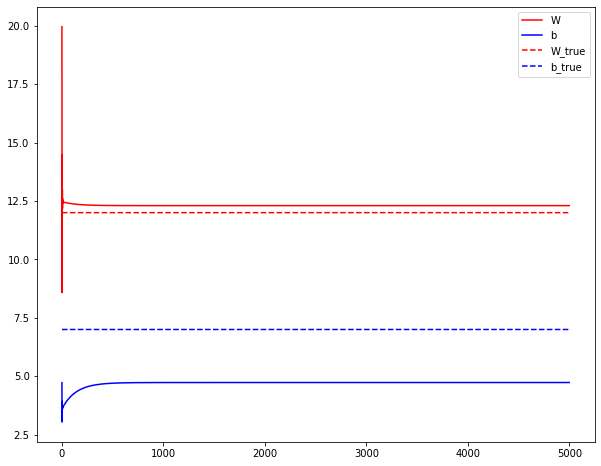

In [240]:
plt.figure(figsize=(10, 8))
plt.plot(range(EPOCHS), ws, 'r', range(EPOCHS), bs, 'b')
plt.plot([w_true]*EPOCHS, 'r--', [b_true]*EPOCHS, 'b--')
plt.legend(['W', 'b', 'W_true', 'b_true'])
plt.show()

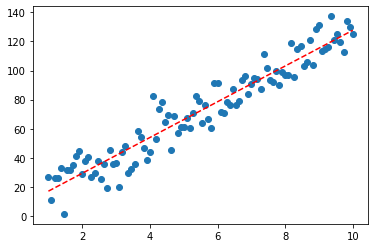

In [242]:
plt.scatter(x, y)
plt.plot(x, lr(x), 'r--')

In [246]:
# Do the same in Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(1, input_shape=[1, ], activation="linear"))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)

In [247]:
model.fit(x, y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 4108.6152 - mse: 4108.6152
Epoch 2/100
4/4 [==============================] - 0s 874us/step - loss: 2133.9629 - mse: 2133.9629
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1166.2935 - mse: 1166.2935
Epoch 4/100
4/4 [==============================] - 0s 795us/step - loss: 665.1172 - mse: 665.1172
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 379.2590 - mse: 379.2590
Epoch 6/100
4/4 [==============================] - 0s 919us/step - loss: 253.6218 - mse: 253.6218
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 187.4607 - mse: 187.4607
Epoch 8/100
4/4 [==============================] - 0s 993us/step - loss: 144.4277 - mse: 144.4277
Epoch 9/100
4/4 [==============================] - 0s 913us/step - loss: 123.7222 - mse: 123.7222
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 113.0394 - mse: 113.0394
Epoch 11/100
4/4 [=====

4/4 [==============================] - 0s 986us/step - loss: 97.4263 - mse: 97.4263
Epoch 87/100
4/4 [==============================] - 0s 939us/step - loss: 97.5279 - mse: 97.5279
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: 97.5039 - mse: 97.5039
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 97.1812 - mse: 97.1812
Epoch 90/100
4/4 [==============================] - 0s 826us/step - loss: 97.3110 - mse: 97.3110
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 97.2491 - mse: 97.2491
Epoch 92/100
4/4 [==============================] - 0s 699us/step - loss: 97.1052 - mse: 97.1052
Epoch 93/100
4/4 [==============================] - 0s 1ms/step - loss: 97.3722 - mse: 97.3722
Epoch 94/100
4/4 [==============================] - 0s 767us/step - loss: 97.1938 - mse: 97.1938
Epoch 95/100
4/4 [==============================] - 0s 821us/step - loss: 97.2471 - mse: 97.2471
Epoch 96/100
4/4 [==============================] -

In [248]:
y_pred = model.predict(x)

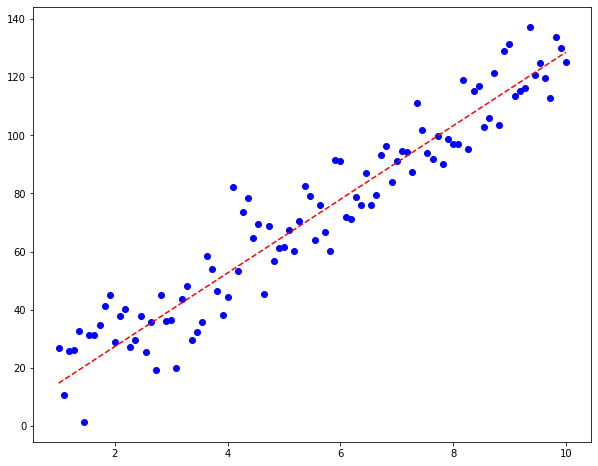

In [250]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='b')
plt.plot(x, y_pred, 'r--')